Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [65]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


target variable is W.

all columns are integer except ERA

# EDA

In [3]:
df.shape

(30, 17)

There are 30 rows and 17 columns

In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

no null values are present

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

all columns are integer datatype except ERA which is float.

<AxesSubplot:xlabel='R', ylabel='Density'>

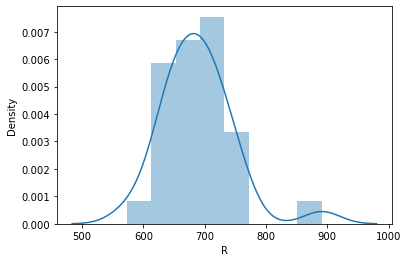

In [6]:
sn.distplot(df['R'])

a bit of skewness is present

<AxesSubplot:xlabel='AB', ylabel='Density'>

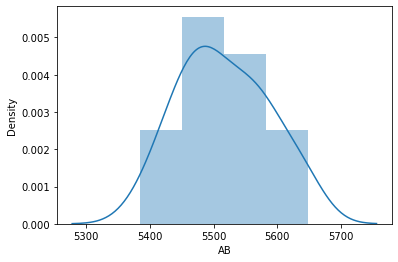

In [7]:
sn.distplot(df['AB'])

almost normally distributed.

<AxesSubplot:xlabel='H', ylabel='Density'>

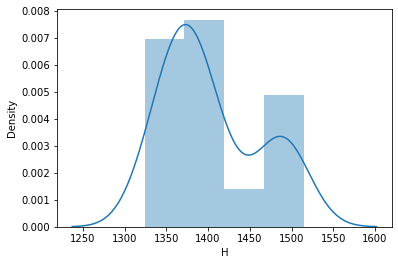

In [8]:
sn.distplot(df['H'])

skewness present.

<AxesSubplot:xlabel='2B', ylabel='Density'>

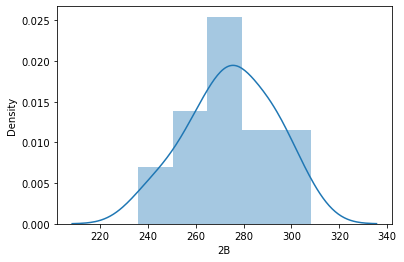

In [9]:
sn.distplot(df['2B'])

bit of left skewed

<AxesSubplot:xlabel='HR', ylabel='Density'>

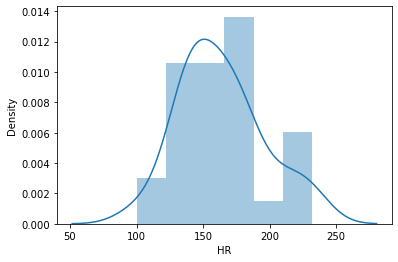

In [10]:
sn.distplot(df['HR'])

slight skewness is present

<AxesSubplot:xlabel='3B', ylabel='Density'>

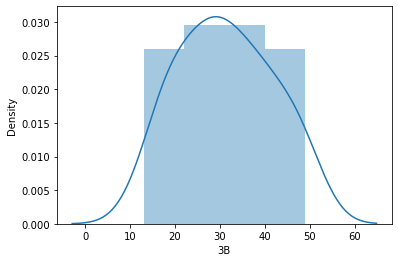

In [11]:
sn.distplot(df['3B'])

almost normally distributed

<AxesSubplot:xlabel='BB', ylabel='Density'>

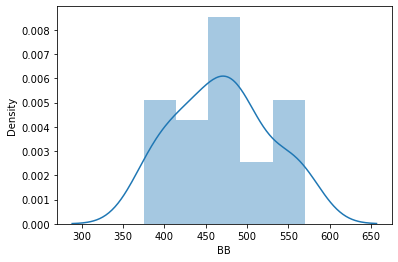

In [12]:
sn.distplot(df['BB'])

bit of skewness is present

<AxesSubplot:xlabel='SO', ylabel='Density'>

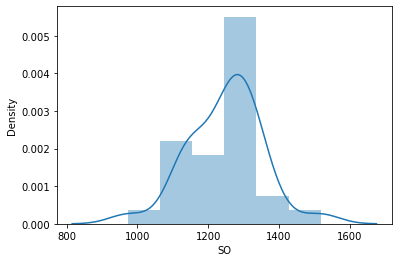

In [13]:
sn.distplot(df['SO'])

skewness is present.

<AxesSubplot:xlabel='SB', ylabel='Density'>

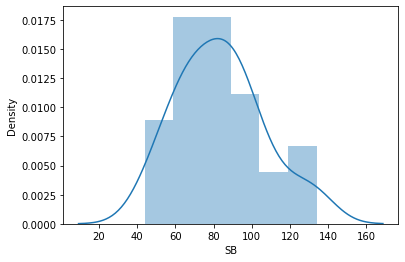

In [14]:
sn.distplot(df['SB'])

skewness is present

<AxesSubplot:xlabel='RA', ylabel='Density'>

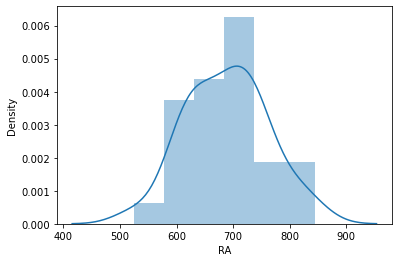

In [15]:
sn.distplot(df['RA'])

bit of left skewed.

<AxesSubplot:xlabel='ER', ylabel='Density'>

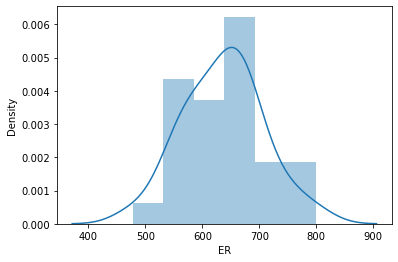

In [16]:
sn.distplot(df['ER'])

almost normally distributed

<AxesSubplot:xlabel='ERA', ylabel='Density'>

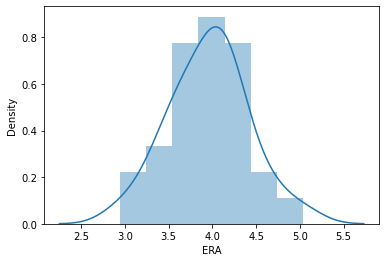

In [17]:
sn.distplot(df['ERA'])

almost normally distributed

<AxesSubplot:xlabel='CG', ylabel='Density'>

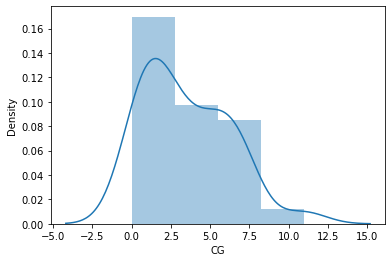

In [18]:
sn.distplot(df['CG'])

skewness is present.

<AxesSubplot:xlabel='SHO', ylabel='Density'>

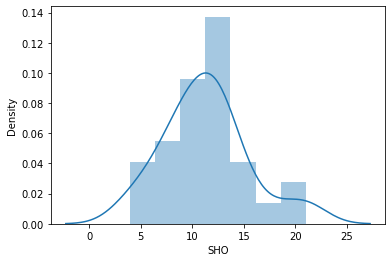

In [19]:
sn.distplot(df['SHO'])

skewness present.

<AxesSubplot:xlabel='E', ylabel='Density'>

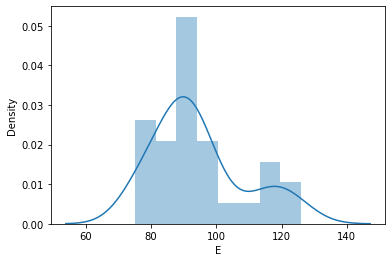

In [20]:
sn.distplot(df['E'])

skewness present

<AxesSubplot:xlabel='SV', ylabel='Density'>

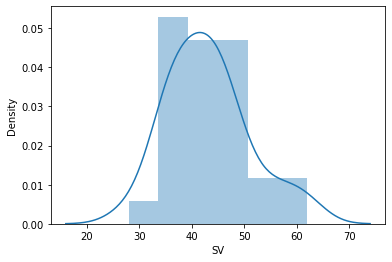

In [21]:
sn.distplot(df['SV'])

skewness present.

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

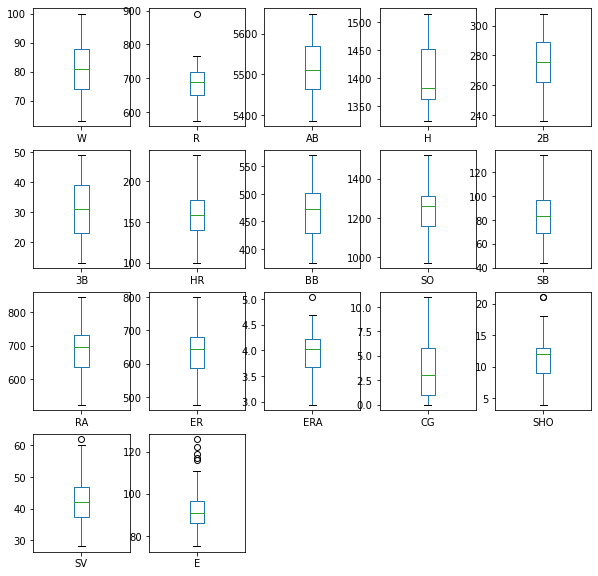

In [22]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

after seeing the box plots we can see thatE, SS, SHO,ERA,R has outliers.

In [23]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


--in AB,HR,CG,SV,E mean is greater than median, skewenss can be present.

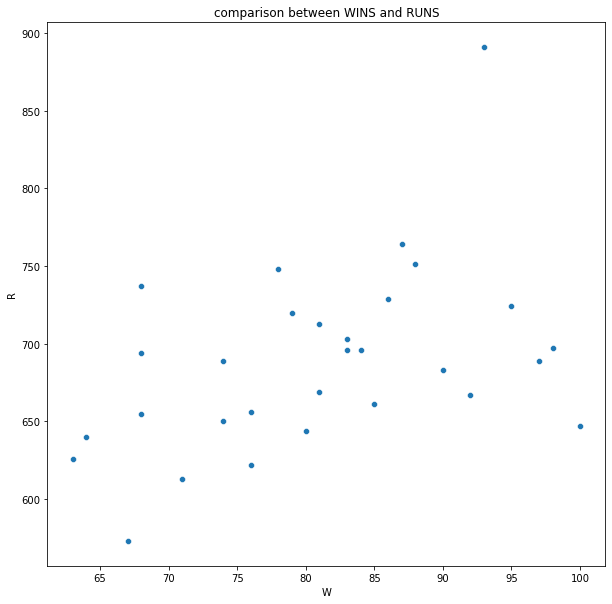

In [24]:
plt.figure(figsize=[10,10])
plt.title("comparison between WINS and RUNS")
sn.scatterplot(df['W'],df['R']);

with more runs wins are more.
900 is the max run but that doesnt matter for the max number of the win.

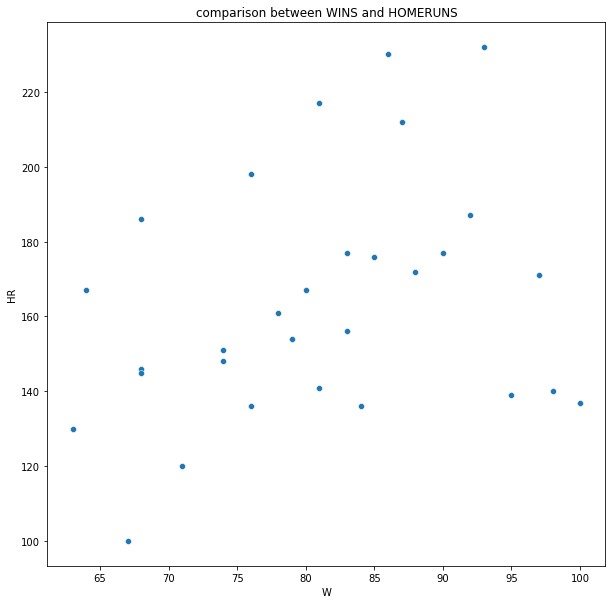

In [25]:
plt.figure(figsize=[10,10])
plt.title("comparison between WINS and HOMERUNS")
sn.scatterplot(df['W'],df['HR']);

more the home runs more winning chances are more.

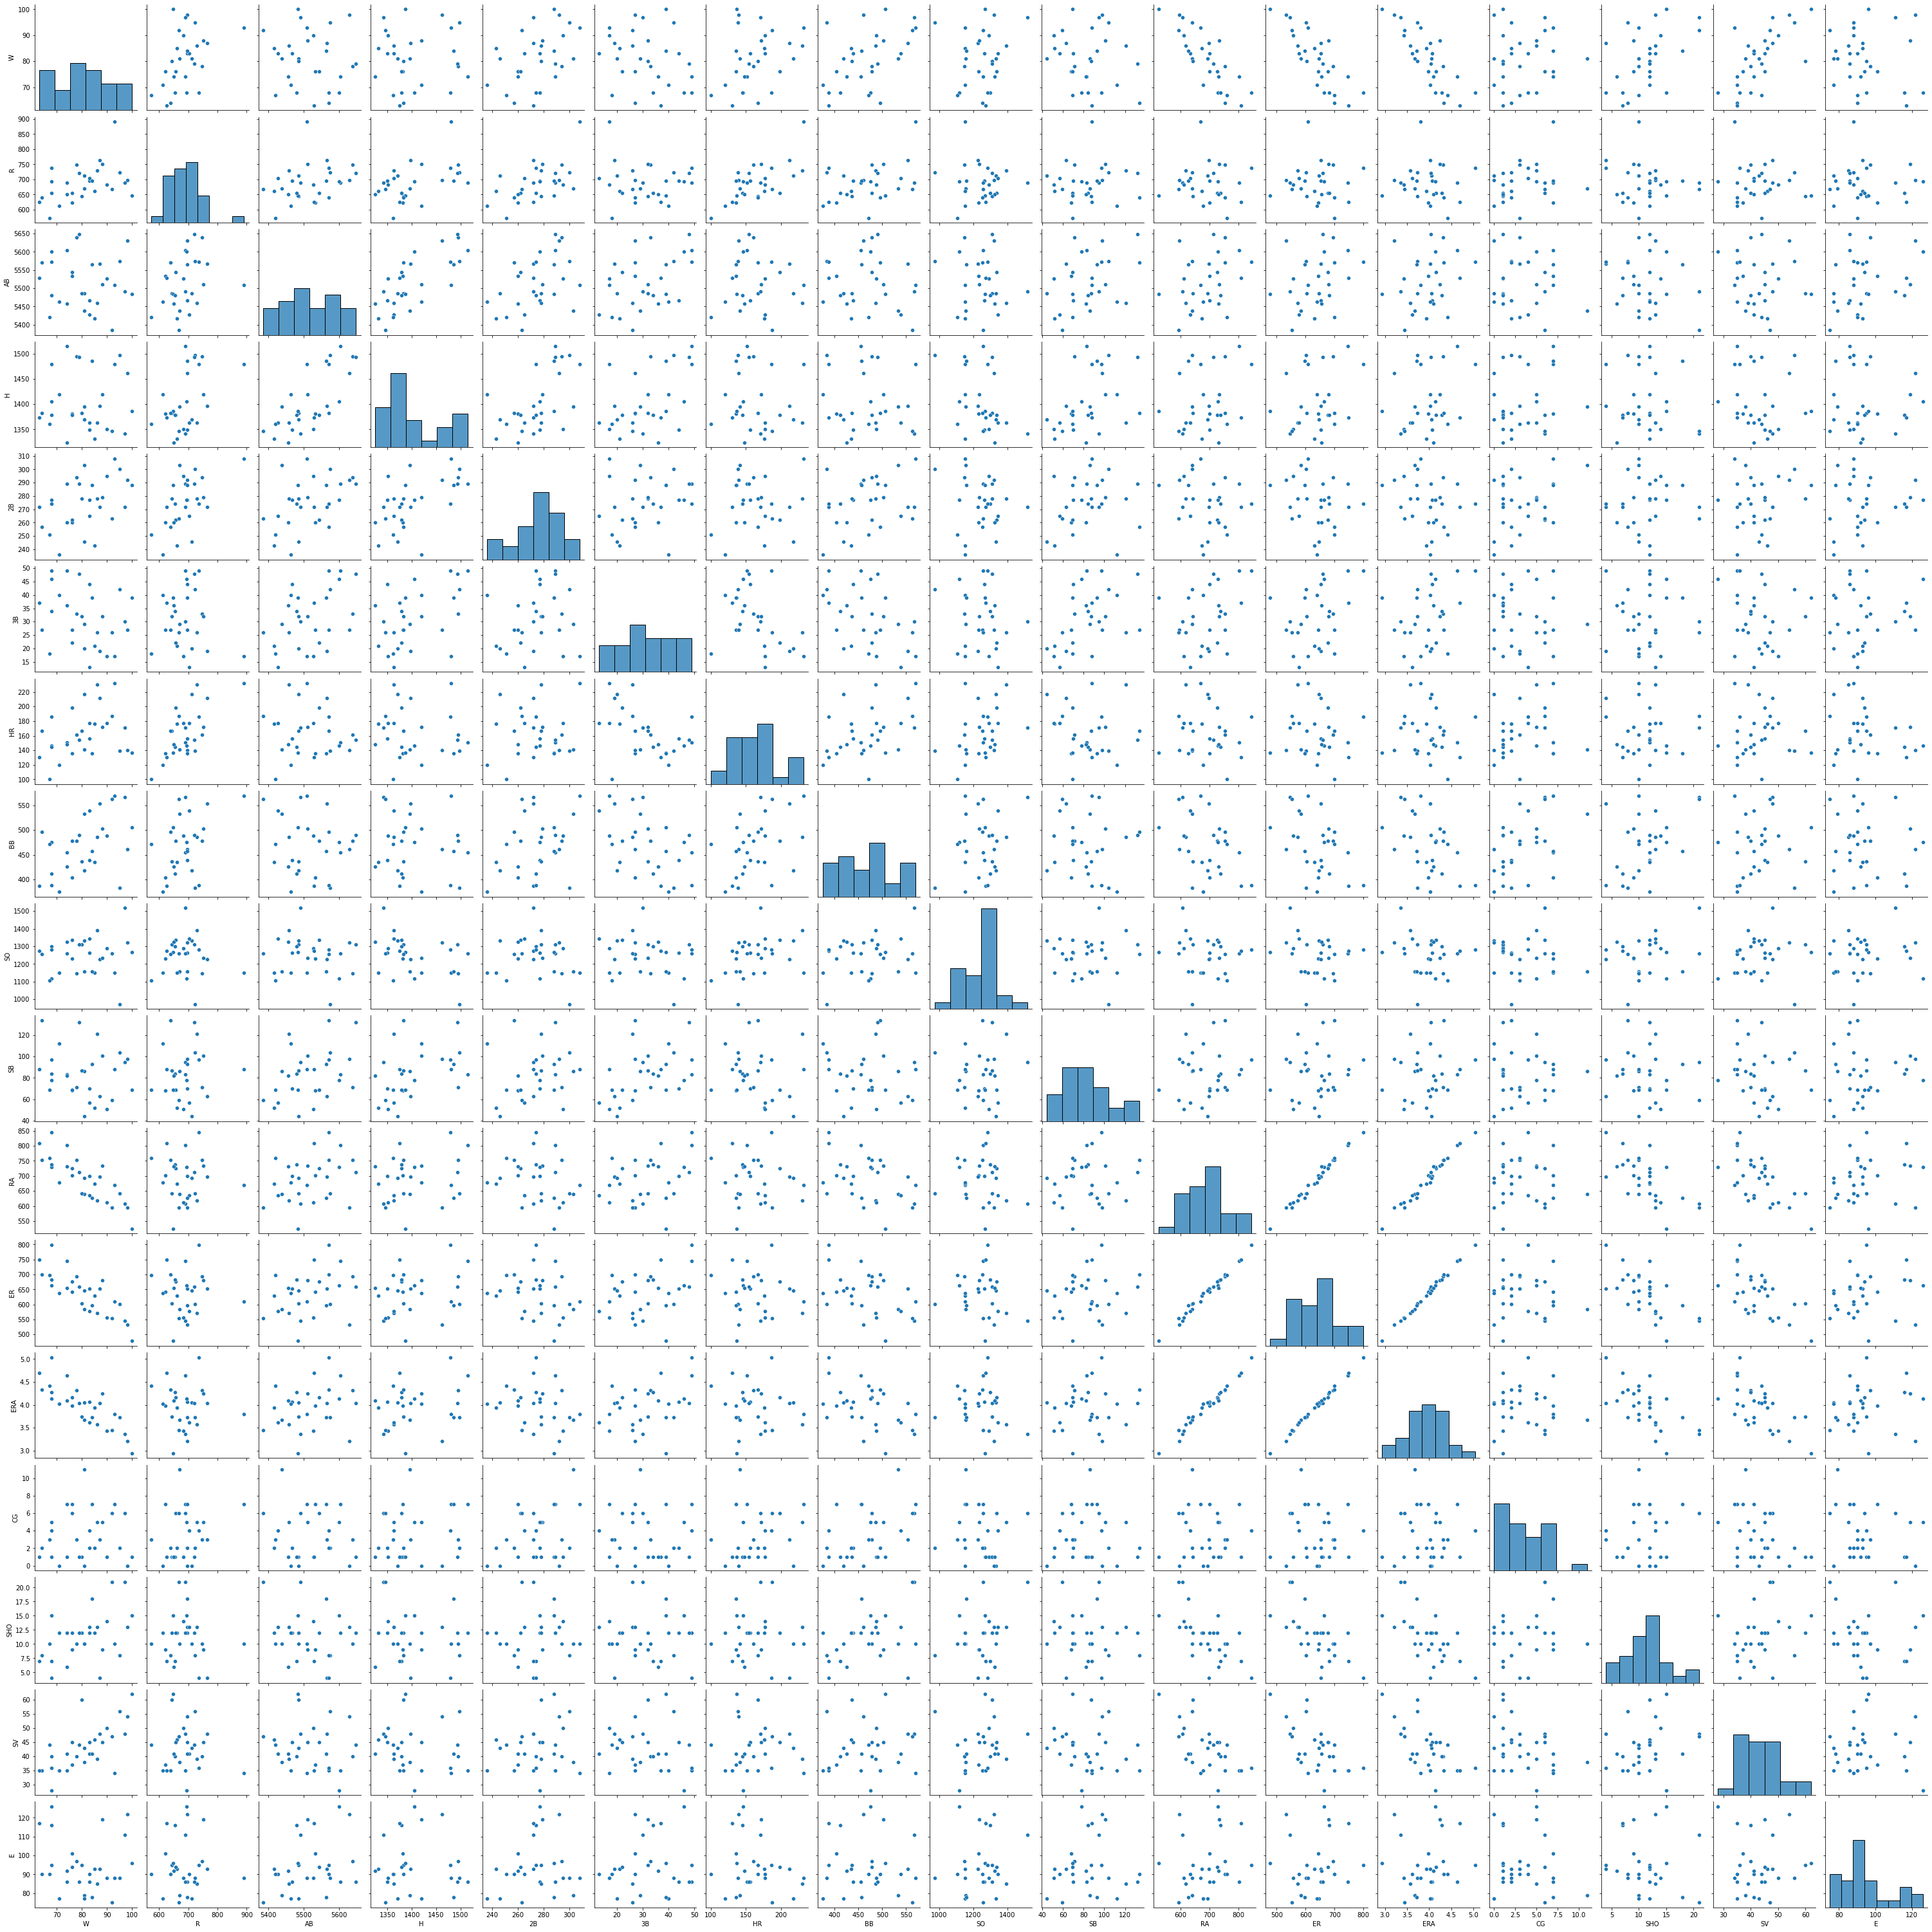

In [130]:
sn.pairplot(df)

if we see the W column it has a negative relationship with ER,ERA,RA.
runs and homeruns have a linear relationshio, more homeruns, more runs.
BB also has a psoitive relation.


In [26]:
df_correlation=df.corr()

<AxesSubplot:>

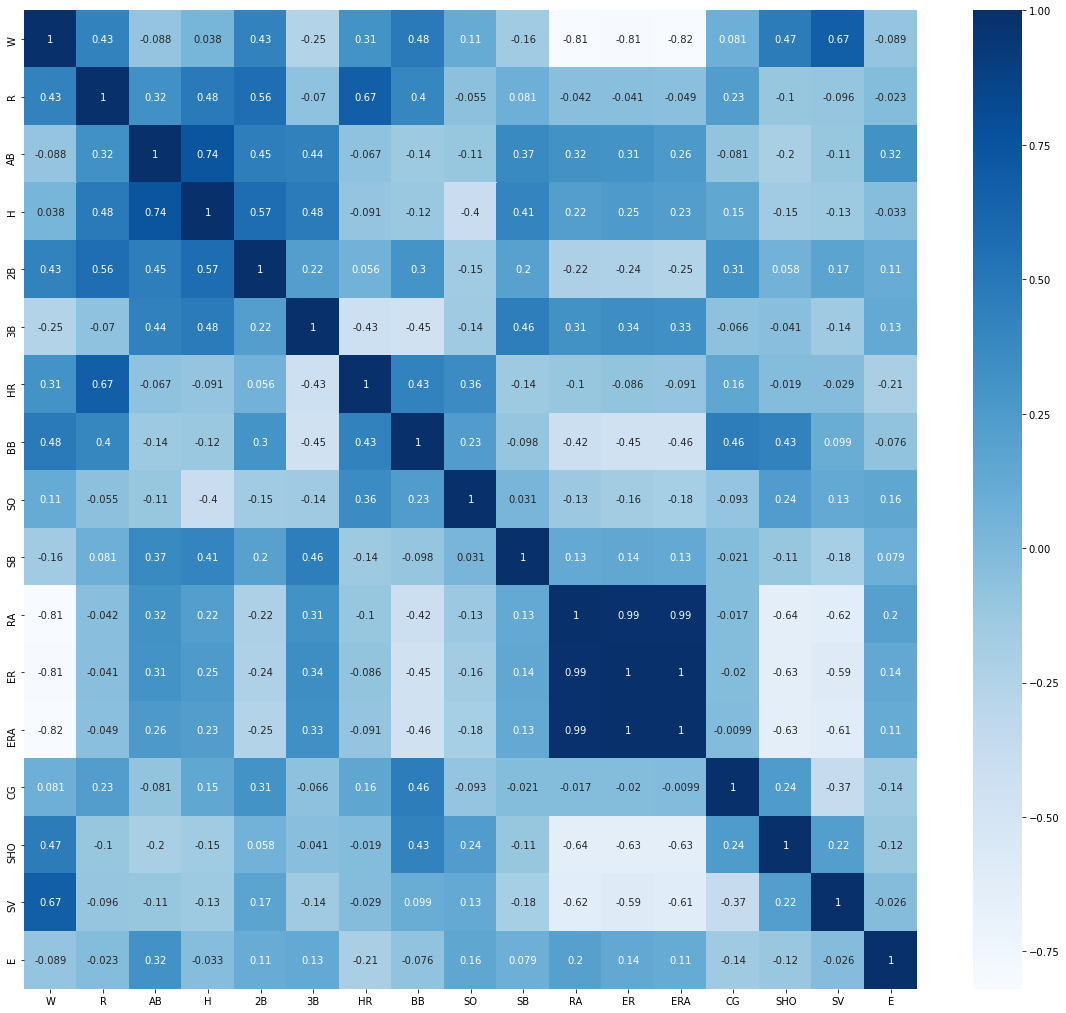

In [27]:
plt.figure(figsize=(20,18))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

the max correlation with w is SV with 0.67.
ER,RA,ERA has most negative correlation with W.

In [67]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [68]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(29, 17)

In [69]:
df.shape

(30, 17)

In [70]:
Data_loss=((30-29)/30)*100
Data_loss 

3.3333333333333335

as the data loss is less than 5% we can remove the outliers.

In [71]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

skewness has gone down after removing the outliers.

In [72]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
def calc_vif(df_new):
    vif=pd.DataFrame()
    vif["variables"]=df_new.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
    return(vif)

In [74]:
calc_vif(df_new)

,variables,VIF FACTOR
0,W,1136.419542
1,R,3372.620602
2,AB,5149.560597
3,H,4646.411583
4,2B,1109.169779
5,3B,35.766244
6,HR,289.402974
7,BB,295.570400
8,SO,400.617550
9,SB,28.931744


ERA has the highly multicollinear hence we will remove this column.

In [75]:
df_new.drop('ER',axis=1,inplace=True)

In [131]:
calc_vif(df_new)

,variables,VIF FACTOR
0,W,60.394955
1,R,80.318339
2,AB,34.706063
3,H,25.536840
4,2B,21.872829
5,3B,13.730818
6,HR,42.255110
7,BB,14.315169
8,SO,23.195424
9,SB,6.438679


multicollinearity has gone down for each column.

In [92]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.532742
dtype: float64

In [77]:
df_new['CG'] = np.sqrt(df_new['CG'])

In [79]:
df_new['SHO']=np.sqrt(df_new['SHO'])

In [81]:
df_new['SV']=np.sqrt(df_new['SV'])

In [83]:
df_new['E']=np.cbrt(df_new['E'])

In [91]:
from scipy.stats import boxcox
#0 -> log transfrom
#.5 -> sqare root transform
df_new['E']=boxcox(df_new['E'],0)

In [87]:
df_new['E'] = np.sqrt(df_new['E'])

In [89]:
df_new['E'] = np.log1p(df_new['E'])

after doing the iterative process of removing the skewness, almost all columns are closer to 0 in skewness.(-/+0.5)

# scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in df_new.columns:
    df_new[i]=mm.fit_transform(df_new[i].values.reshape(-1,1))

scaled the columns of the dataframe

In [95]:
df_new.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.864865,0.790576,0.719697,0.905759,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.376190,0.426401,0.320776,0.848715,0.318541
1,0.540541,0.643979,0.310606,0.130890,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.538095,0.426401,0.566915,0.548576,0.273333
2,0.486486,0.502618,0.204545,0.371728,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.347619,1.000000,0.450046,0.338010,0.104636
3,0.351351,0.256545,0.560606,0.298429,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.495238,0.797724,0.387210,0.306392,0.585413
4,0.297297,0.607330,0.833333,1.000000,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.809524,0.797724,0.566915,0.241849,0.273333


In [96]:
x=df_new.drop('W',axis=1)
y=df_new['W']

splitting x and y variable for training and testing purpose.

# Training and testing of model

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [98]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [99]:
chosen_model(LinearRegression)

best accuracy is 0.8471385626933163 on random state 62


In [100]:
chosen_model(Lasso)

best accuracy is 0 on random state 0


In [101]:
chosen_model(Ridge)

best accuracy is 0.8774678286415862 on random state 141


In [102]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.8025751072961376 on random state 158


In [103]:
chosen_model(KNeighborsRegressor)

best accuracy is 0.7268550200410597 on random state 13


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=62)

In [105]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[ 0.59332492 -3.0284875   0.42246757  0.40166974  0.58430987  0.83981769
 -3.46073815]
-0.5210908376528576
1.7314840522664245


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=141)

In [49]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lasso(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[-0.04200645 -0.10755556 -0.64963304 -0.80575113 -0.21998984 -0.5730676
 -0.7076405 ]
-0.4436634450409035
0.28891101487726684


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=141)

In [107]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Ridge(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[ 0.379491   -0.70451534 -0.28551096  0.30107351  0.69303005  0.8500722
  0.85748086]
0.2987316164921382
0.5511053583450095


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=158)

In [109]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[-2.92466765e-01 -6.88888889e+00  3.24483776e-02 -3.60201511e-01
  8.03423523e-01  6.28557164e-01 -1.77619893e-03]
-0.8684148999354685
2.49097486682068


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=13)

In [111]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[ 0.09409158  0.656      -1.89415929  0.05698453  0.49976808  0.59165252
  0.69932504]
0.10052320926138493
0.8492364501237891


after seeing the model performance and the cross val score the least difference between the two is in Ridge model. hence it is our best model.

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=141)

In [113]:
model=[Ridge()]
for a in model:
    a.fit(x_train,y_train)
    a.score(x_train,y_train)
    predm=a.predict(x_test)
    print('accuracy score of' ,a, 'is:')
    print(r2_score(y_test,predm))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

accuracy score of Ridge() is:
0.8774678286415862
error:
Mean absolute error: 0.07823544913494307
mean squared error: 0.009900134020419388
root Mean Squared Error:  0.09949941718633024




# Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [121]:
parameter={'fit_intercept':['True','False'],
         'normalize':['True','False'],
          'copy_X':['True','False'],
          'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}

In [59]:
parameter={'n_neighbors':np.arange(0,10),
          'weights':['uniform','distance'],
          'p':np.arange(0,10),
          'algorithm':['auto','ball_tree','kd_tree','brute']}

In [126]:
GCV=GridSearchCV(Ridge(),parameter,cv=10)

In [127]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [128]:
GCV.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'normalize': 'True',
 'solver': 'auto'}

In [129]:
baseball_mod=Ridge(copy_X=True,fit_intercept=True,normalize=True,solver='auto')
baseball_mod.fit(x_train,y_train)
pred=baseball_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

89.58716449462298


after doing the hyperparameter tuning the score that we are receiving is 89.58, almost 90% which is a good model.

# Saving the model

In [132]:
import joblib
joblib.dump(baseball_mod,'baseballWins.pkl')

['baseballWins.pkl']